<a href="https://colab.research.google.com/github/aitormorais/Qiskit/blob/main/empezando_de_nuevo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import networkx as nx

In [307]:
import itertools

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt



In [344]:
def generar_grafo(numero_ciudades):
    """
    Genera un grafo completo con un número dado de ciudades como nodos y asigna distancias aleatorias a cada par de nodos comprendidas entre el 1 y el 10.
    
    Parámetros
    ----------
    numero_ciudades : int
        El número de ciudades (nodos) para incluir en el grafo.
        
    Devoluciones
    ------------
    G : networkx.classes.graph.Graph
        Un objeto de grafo completo de NetworkX con 'numero_ciudades' nodos y distancias aleatorias asignadas a cada par de nodos.
        
    distancias : dict
        Un diccionario de NetworkX que mapea cada par de nodos a la 'distancia' entre ellos. Las claves del diccionario son tuplas de dos elementos que representan los pares de nodos, y los valores son las distancias aleatorias asignadas.
        
    Ejemplo
    -------
    >>> G, distancias = generar_grafo(5)
    >>> print(G.edges(data=True))
    [(0, 1, {'distancia': 3}), (0, 2, {'distancia': 7}), (0, 3, {'distancia': 2}), (0, 4, {'distancia': 6}), 
    (1, 2, {'distancia': 10}), (1, 3, {'distancia': 1}), (1, 4, {'distancia': 8}), (2, 3, {'distancia': 4}), 
    (2, 4, {'distancia': 5}), (3, 4, {'distancia': 9})]
    >>> print(distancias)
    {(0, 1): 3, (0, 2): 7, (0, 3): 2, (0, 4): 6, (1, 2): 10, (1, 3): 1, (1, 4): 8, (2, 3): 4, (2, 4): 5, (3, 4): 9}
    """
    # Crear un grafo completo con 'numero_ciudades' nodos
    G = nx.complete_graph(numero_ciudades)
    # Asignar una distancia aleatoria (entre 1 y 10) a cada par de nodos
    for (u, v) in G.edges():
        G.edges[u, v]['distancia'] = random.randint(1, 10)
    # Obtener un diccionario de las distancias entre cada par de nodos
    distancias = nx.get_edge_attributes(G, 'distancia')
    return G, distancias


In [345]:
def dibujar_grafo(G):
    """
    Dibuja el grafo en un layout circular con las etiquetas de nodos y las distancias de las aristas.

    Parámetros
    ----------
    G : networkx.classes.graph.Graph
        Un objeto de grafo de NetworkX que se desea dibujar. Cada arista del grafo debe tener un atributo de 'distancia'.

    Devoluciones
    ------------
    None : Esta función no devuelve nada pero genera un gráfico de matplotlib.

    Ejemplo
    -------
    >>> G, _ = generar_grafo(5)
    >>> dibujar_grafo(G)
    """
    # Crear un layout circular para el grafo
    pos = nx.circular_layout(G)
    
    # Dibujar el grafo con las etiquetas de los nodos
    nx.draw(G, pos, with_labels=True)
    
    # Obtener un diccionario de las distancias entre cada par de nodos
    labels = nx.get_edge_attributes(G, 'distancia')
    
    # Dibujar las etiquetas de las aristas (distancias)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


In [ ]:
grafo, distancias = generar_grafo(8)

In [348]:
def generar_diccionario_viajes(grafo, distancias):
    """
    Genera un diccionario de todos los posibles viajes entre los nodos del grafo y sus respectivas distancias.

    Parámetros
    ----------
    grafo : NetworkX Graph
        El grafo sobre el cual se generan los viajes. Cada nodo del grafo representa una ciudad.

    distancias : dict
        Un diccionario que mapea cada par de nodos (ciudades) a la distancia entre ellos.

    Devoluciones
    ------------
    dicionario : dict
        Un diccionario donde cada clave es una tupla que representa un posible viaje entre las ciudades,
        y cada valor es la distancia total de ese viaje.

    Ejemplo
    -------
    >>> grafo = nx.complete_graph(3)
    >>> distancias = {(0, 1): 2, (1, 2): 3, (0, 2): 1}
    >>> dicionario = generar_diccionario_viajes(grafo, distancias)
    >>> print(dicionario)
    {(0, 1, 2): 5, (0, 2, 1): 4, (1, 0, 2): 6, (1, 2, 0): 3, (2, 0, 1): 3, (2, 1, 0): 6}
    """
    #list(range(grafo.number_of_nodes())) == nodos
    #len(list(range(grafo.number_of_nodes())))) == len(nodos)
    # Genera todas las posibles permutaciones de los nodos en el grafo
    permutaciones = list(itertools.permutations(list(range(grafo.number_of_nodes())), len(list(range(grafo.number_of_nodes())))))

    # Inicializa el diccionario vacío
    dicionario = {}

    # Para cada posible viaje, calcula la distancia total y la almacena en el diccionario
    for viaje in permutaciones:
      dicionario[viaje] = distancia_entera(viaje, distancias)

    # Devuelve el diccionario de viajes y distancias
    return dicionario


In [ ]:
def generar_dic_viajes(grafo,distancias):#comaparar???
  """generar un dicionario con todos los viajes y su respectiva distancia"""
  # Obteniendo el número de nodos
  nodos = list(range(grafo.number_of_nodes()))
  # Define el número de nodos en cada permutación
  k = len(nodos)
  # Genera todas las permutaciones de k nodos
  permutaciones = list(itertools.permutations(nodos, k))
  #crear dicionario
  dicionario = {}
  for viaje in permutaciones:
    dicionario[viaje] = distancia_entera(viaje,distancias)
  return dicionario


In [ ]:
def de(viaje, labels):
    suma = 0
    for i in range(len(viaje)):
        pueblo = viaje[i]
        if i == len(viaje) - 1:  # es el último elemento
            siguiente = viaje[0]
        else:
            siguiente = viaje[i+1]

        clave = tuple(sorted((pueblo, siguiente)))
        distancia = labels.get(clave, None)
        if distancia is not None:
            suma += distancia

    return suma


In [ ]:
def distancia_entera(viaje,labels):
  suma = 0
  for pueblo in viaje:
    if pueblo == viaje[-1]:
      clave = (viaje[0],pueblo) if pueblo > viaje[0] else (pueblo,viaje[0])
      suma = suma +labels.get(clave, None)
    else:
      siguiente= viaje[viaje.index(pueblo)+1]
      clave = (pueblo,siguiente ) if siguiente > pueblo else (siguiente,pueblo)
      suma = suma +labels.get(clave, None)
  return suma

In [347]:
def medir_tiempo(func, args, numero):
    """
    Mide el tiempo de ejecución de una función específica varias veces.

    Parámetros
    ----------
    func : Callable
        La función cuyo tiempo de ejecución se desea medir.

    args : list
        Una lista de los argumentos para pasar a la función.

    numero : int
        El número de veces que se debe ejecutar la función para medir su tiempo de ejecución.

    Devoluciones
    ------------
    tiempos : list
        Una lista de los tiempos de ejecución de la función.

    Ejemplo
    -------
    >>> def suma(x, y):
    ...     return x + y
    ...
    >>> tiempos = medir_tiempo(suma, [1, 2], 100)
    """
    # Inicializar una lista vacía para almacenar los tiempos de ejecución
    tiempos = []

    # Ejecutar la función el número especificado de veces
    for _ in range(numero):

        # Registrar el tiempo antes de ejecutar la función
        inicio = time.time()

        # Ejecutar la función con los argumentos dados
        func(*args)

        # Registrar el tiempo después de ejecutar la función
        fin = time.time()

        # Calcular el tiempo de ejecución y agregarlo a la lista de tiempos
        tiempos.append(fin - inicio)

    # Devolver la lista de tiempos de ejecución
    return tiempos


In [346]:
def medir_tiempos(funciones, argumentos, numero):
    """
    Mide el tiempo de ejecución de varias funciones, ejecutándolas un número especificado de veces.

    Parámetros
    ----------
    funciones : list
        Una lista de funciones cuyos tiempos de ejecución se quieren medir.
    argumentos : list
        Una lista de listas. Cada sublista contiene los argumentos para la función correspondiente en la lista de funciones.
    numero : int
        El número de veces que se quiere ejecutar cada función para medir su tiempo de ejecución.

    Devoluciones
    ------------
    tiempos : dict
        Un diccionario donde las claves son los nombres de las funciones y los valores son listas de los tiempos de ejecución de la correspondiente función.

    Ejemplo
    -------
    >>> def suma(a, b):
    ...     return a + b
    >>> def producto(a, b):
    ...     return a * b
    >>> funciones = [suma, producto]
    >>> argumentos = [[1, 2], [3, 4]]
    >>> medir_tiempos(funciones, argumentos, 10)
    {'suma': [1.1920928955078125e-06, 9.5367431640625e-07, ...],
     'producto': [9.5367431640625e-07, 1.1920928955078125e-06, ...]}
    """
    tiempos = {}
    for func, args in zip(funciones, argumentos):
        tiempos[func.__name__] = medir_tiempo(func, args, numero)
    return tiempos


In [356]:

def comparar_tiempos(nombres, medias, maximos, minimos):
    """
    Dibuja un gráfico de barras para comparar los tiempos de ejecución de diferentes funciones.

    Parámetros
    ----------
    nombres : list of str
        Los nombres de las funciones a comparar.
    medias : list of list of float
        Los tiempos de ejecución medios para cada función.
    maximos : list of list of float
        Los tiempos de ejecución máximos para cada función.
    minimos : list of list of float
        Los tiempos de ejecución mínimos para cada función.
    """
    x = np.arange(len(nombres))  # las ubicaciones de las etiquetas
    width = 0.2  # el ancho de las barras

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, medias, width, label='Media')
    rects2 = ax.bar(x, maximos, width, label='Máximo')
    rects3 = ax.bar(x + width, minimos, width, label='Mínimo')

    # Añadir algunas etiquetas de texto, título y leyenda
    ax.set_ylabel('Tiempo (s)')
    ax.set_title('Tiempos de ejecución')
    ax.set_xticks(x)
    ax.set_xticklabels(nombres)
    ax.legend()

    # Función para manejar el evento de pasar el ratón sobre una barra
    def on_motion(event):
        if event.inaxes == ax:
            for i, rect in enumerate(np.hstack((rects1, rects2, rects3))):
                if rect.contains(event)[0]:
                    height = rect.get_height()
                    message = f"Altura: {height}"
                    fig.canvas.toolbar.set_message(message)
                    break
            else:
                fig.canvas.toolbar.set_message("")
        else:
            fig.canvas.toolbar.set_message("")

    # Conectar la función de manejo de eventos al canvas del gráfico
    fig.canvas.mpl_connect('motion_notify_event', on_motion)

    # Mostrar el gráfico
    plt.show()



In [ ]:
funciones = [de, distancia_entera]
argumentos = [[[0,1,7,3,4,5,6,2], distancias], [[0,1,7,3,4,5,6,2], distancias]]

In [364]:
def grafico(funciones, argumentos):
    """
    Esta función genera un gráfico comparativo de los tiempos de ejecución de diferentes funciones.

    Parámetros
    ----------
    funciones : list of function
        Una lista de las funciones que se van a comparar. 
        Cada función debería tomar los mismos argumentos.
    argumentos : list of list
        Una lista de listas. Cada sublista es una lista de argumentos para pasar a cada función. 
        Todas las sub-listas deben tener el mismo tamaño y los argumentos deben estar en el mismo orden para cada función.

    Notas
    -----
    Esta función utiliza las funciones 'medir_tiempos' y 'crear_arrays_tiempos' para medir y preparar los datos de los tiempos de ejecución.
    Después, utiliza la función 'comparar_tiempos' para generar y mostrar el gráfico de barras.
    """
    lista = []
    nombres = []
    for clave, valor in medir_tiempos(funciones, argumentos, 10000).items():
        nombres.append(clave)
        lista.append(valor)
    comparar_tiempos(nombres, *crear_arrays_tiempos(lista))


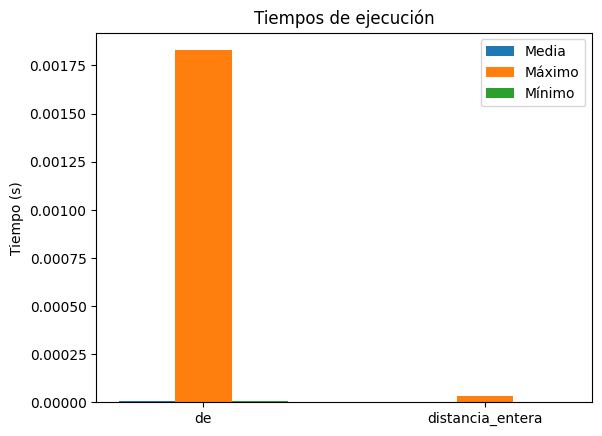

In [365]:
grafico(funciones,argumentos)

In [324]:
def crear_arrays_tiempos(lista_tiempos):

  medias = []
  maximos = []
  minimos = []

  for lista in lista_tiempos:
    
    #print(medias.append(np.mean(lista)))
    medias.append(np.mean(lista))
    maximos.append(np.max(lista))
    minimos.append(np.min(lista))

  return medias,maximos,minimos




In [330]:
medias,maximos,minimos = crear_arrays_tiempos(lista)

In [352]:
def ct(nombres,medias,maximos,minimos):
  x = np.arange(len(nombres))  # las ubicaciones de las etiquetas
  width = 0.2  # el ancho de las barras

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width, medias, width, label='Media')
  rects2 = ax.bar(x, maximos, width, label='Máximo')
  rects3 = ax.bar(x + width, minimos, width, label='Mínimo')

  # Añadir algunas etiquetas de texto, título y leyenda
  ax.set_ylabel('Tiempo (s)')
  ax.set_title('Tiempos de ejecución')
  ax.set_xticks(x)
  ax.set_xticklabels(nombres)
  ax.legend()

  # Mostrar el gráfico
  plt.show()


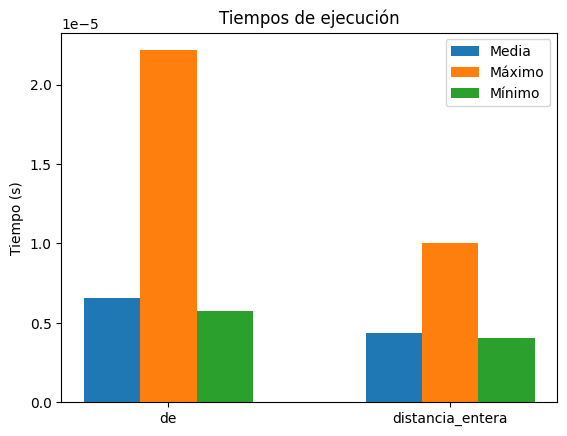

In [331]:
comparar_tiempos(nombres,medias,maximos,minimos)

In [ ]:
def prepar(tiempos):
    medias = []
    maximos = []
    minimos = []
    nombres = []
    for clave, valor in tiempos.items():
        nombres.append(clave)
        med, mas, men = crear_arrays_tiempos(valor)
        medias.append(med)
        maximos.append(mas)
        minimos.append(men)
    return nombres, medias, maximos, minimos






In [ ]:
a

['de', 'distancia_entera']

ValueError: ignored

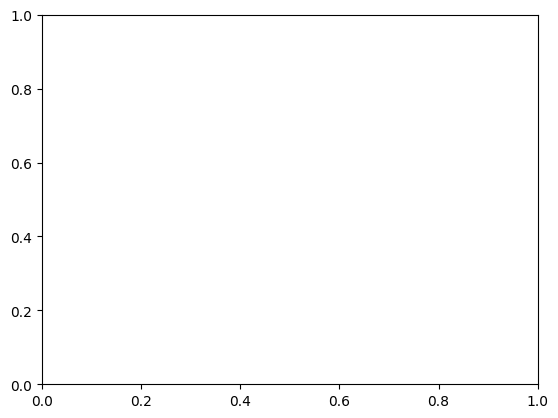

In [ ]:
funciones = [de, distancia_entera]
argumentos = [[[0,1,7,3,4,5,6,2], distancias], [[0,1,7,3,4,5,6,2], distancias]]
tiempos = medir_tiempos(funciones, argumentos,100)
comparar_tiempos(*prepar(tiempos))